In [13]:
import os
import pickle
import matplotlib.pyplot as plt
from collections import Counter

In [14]:

pickle_file_path = os.path.join('..', 'data', 'dataset_5k.pickle')

with open(pickle_file_path, "rb") as pickle_file:
    data = pickle.load(pickle_file)

len(data)

5000

In [15]:
data_size = 5000

def get_nested_value(data, keys, default=None):
    """
    Access nested values in a dictionary with error handling for potential None values.
    """
    try:
        for key in keys:
            data = data[key]
        return data if data is not None else default
    except (TypeError, KeyError):
        return default

pub_years = [rec.get('publication_year', None) for rec in data[:data_size]]
languages = [rec.get('language') for rec in data[:data_size] if rec.get('language') is not None]
journals = [get_nested_value(rec, ['primary_location', 'source', 'display_name']) for rec in data[:data_size] if get_nested_value(rec, ['primary_location', 'source', 'display_name']) is not None]
is_oa = [get_nested_value(rec, ['primary_location', 'is_oa']) for rec in data[:data_size] if get_nested_value(rec, ['primary_location', 'is_oa']) is not None]
pdf_url = [get_nested_value(rec, ['primary_location', 'pdf_url']) for rec in data[:data_size] if get_nested_value(rec, ['primary_location', 'pdf_url']) is not None]
pub_type = [rec.get('type', None) for rec in data[:data_size]]
oa_status = [get_nested_value(rec, ['open_access', 'oa_status']) for rec in data[:data_size]]
ids = [get_nested_value(rec, ['id'], None) for rec in data[:data_size] if get_nested_value(rec, ['id'], None) is not None]
doi = [get_nested_value(rec, ['doi'], None) for rec in data[:data_size] if get_nested_value(rec, ['doi'], None) is not None]
title = [get_nested_value(rec, ['title'], None) for rec in data[:data_size] if get_nested_value(rec, ['title'], None) is not None]
publication_date = [get_nested_value(rec, ['publication_date'], None) for rec in data[:data_size] if get_nested_value(rec, ['publication_date'], None) is not None]
canonical_ids = [get_nested_value(rec, ['ids'], None) for rec in data[:data_size] if get_nested_value(rec, ['ids'], None) is not None]
paper_type = [get_nested_value(rec, ['type'], None) for rec in data[:data_size]]
open_access_info = [get_nested_value(rec, ['open_access', 'oa_status'], None) for rec in data[:data_size]]
keywords = [get_nested_value(rec, ['keywords'], None) for rec in data[:data_size] if get_nested_value(rec, ['keywords'], None) is not None and len(get_nested_value(rec, ['keywords'], [])) > 0]
concepts = [get_nested_value(rec, ['concepts'], None) for rec in data[:data_size] if get_nested_value(rec, ['concepts'], None) is not None and len(get_nested_value(rec, ['concepts'], [])) > 0]
mesh_topics = [get_nested_value(rec, ['mesh'], None) for rec in data[:data_size] if get_nested_value(rec, ['mesh'], None) is not None and len(get_nested_value(rec, ['mesh'], [])) > 0]
published_locations = [get_nested_value(rec, ['locations'], None) for rec in data[:data_size] if get_nested_value(rec, ['locations'], None) is not None and len(get_nested_value(rec, ['locations'], [])) > 0]
cited_works = [get_nested_value(rec, ['referenced_works'], None) for rec in data[:data_size] if get_nested_value(rec, ['referenced_works'], None) is not None and len(get_nested_value(rec, ['referenced_works'], [])) > 0]
is_retracted = [get_nested_value(rec, ['is_retracted'], None) for rec in data[:data_size]]
total_refs = [get_nested_value(rec, ['referenced_works_count'], None) for rec in data[:data_size]]
apc_paid = [get_nested_value(rec, ['apc_paid', 'value'], None) for rec in data[:data_size] if get_nested_value(rec, ['apc_paid', 'value'], None) is not None]
cited_by_count = [get_nested_value(rec, ['cited_by_count'], None) for rec in data[:data_size]]
abstract = sum('abstract_inverted_index' in d and d['abstract_inverted_index'] is not None for d in data)


In [16]:
def plot_filtered_lists(filtered_lists, anzahl_mit_abstract):
    plt.figure(figsize=(15, 5))
    lengths = [len(lst) for lst in filtered_lists if lst != 'position_info']
    lengths.append(anzahl_mit_abstract)
    
    labels = ['ids', 'doi', 'title', 'publication_date', 'canonical_ids', 'paper_type', 
              'open_access_info', 'keywords', 'concepts', 'mesh_topics', 
              'published_locations', 'cited_works', 'is_retracted', 
              'total_refs', 'apc_paid', 'cited_by_count', 'abstracts']
    
    positions = range(len(labels))
    bars = plt.bar(positions, lengths, color='skyblue')
    
    plt.xlabel('Attributes')
    plt.ylabel('Count')
    plt.xticks(positions, labels, rotation=45, ha='right')
    plt.title('Data distribution by Frequency')

    for bar, length in zip(bars, lengths):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), length, 
                 ha='center', va='bottom', fontsize=9, color='black')
    
    plt.tight_layout()
    plt.show()


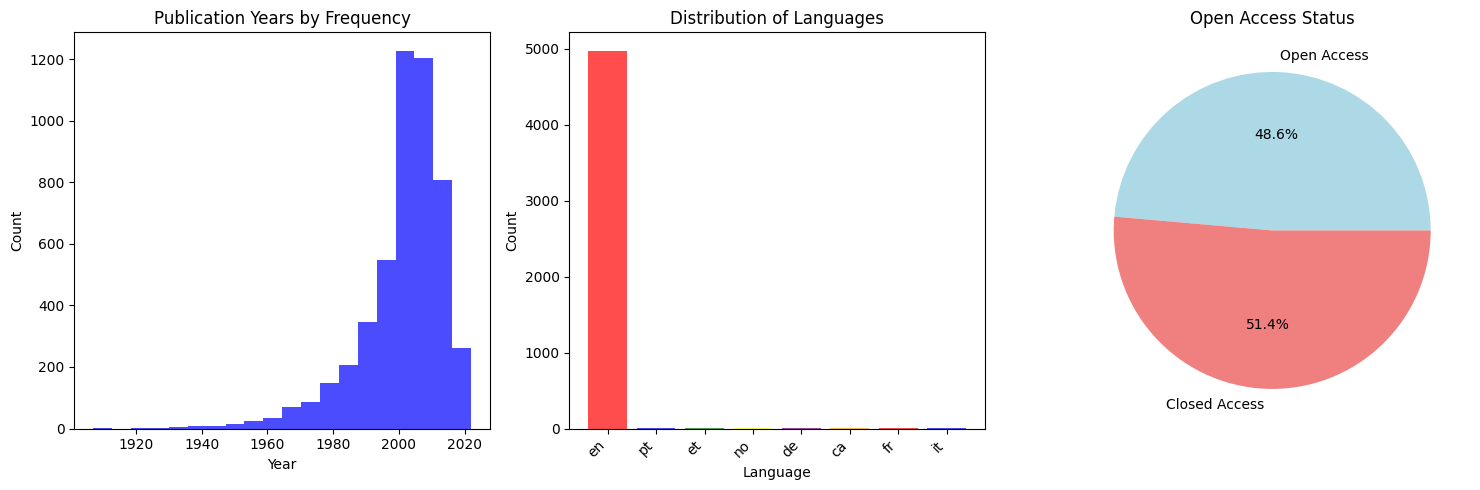

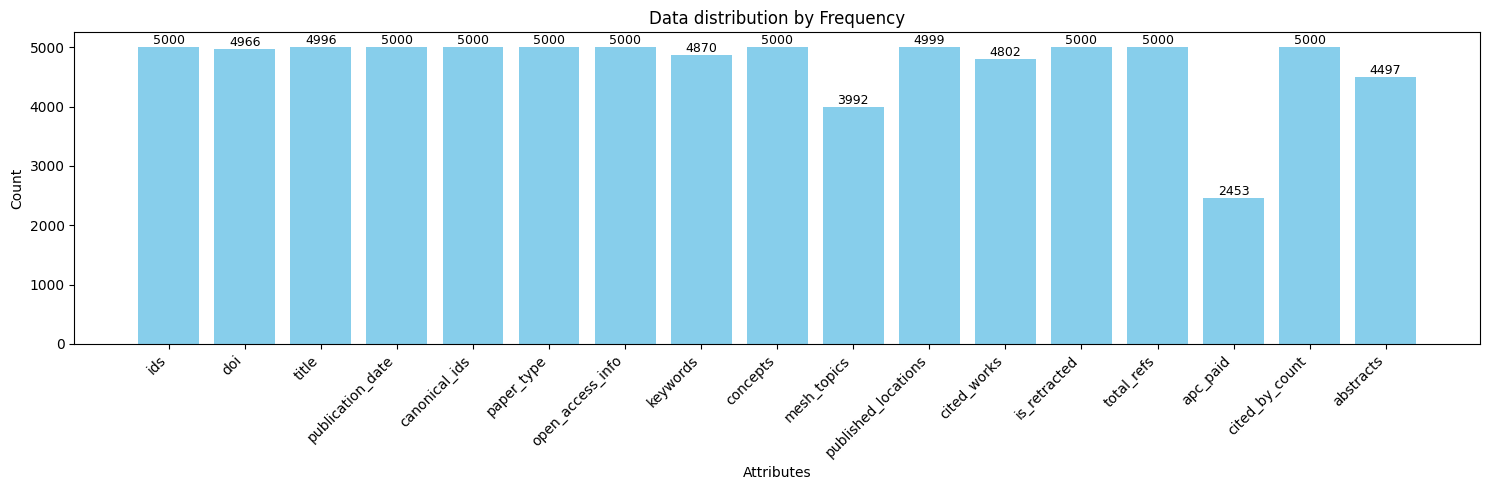

In [17]:
count_with_abstract = sum('abstract_inverted_index' in d and d['abstract_inverted_index'] is not None for d in data)

def plot_combined_analysis(pub_years, languages, is_oa):
    # Filter out None values from languages
    languages = [lang for lang in languages if lang is not None]

    # Plotting
    plt.figure(figsize=(15, 5))

    # Plot for publication years
    plt.subplot(1, 3, 1)
    plt.hist(pub_years, bins=20, color='blue', alpha=0.7)
    plt.title('Publication Years by Frequency')
    plt.xlabel('Year')
    plt.ylabel('Count')

    # Plot for languages as a bar chart
    plt.subplot(1, 3, 2)
    language_counts = Counter(languages)
    labels, counts = zip(*language_counts.items())
    plt.bar(labels, counts, color=['red', 'blue', 'green', 'yellow', 'purple', 'orange'], alpha=0.7)
    plt.title('Distribution of Languages')
    plt.xlabel('Language')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')

    # Pie Chart for Open Access Status
    plt.subplot(1, 3, 3)
    plt.pie([is_oa.count(True), is_oa.count(False)], labels=['Open Access', 'Closed Access'], autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
    plt.title('Open Access Status')

    plt.tight_layout()
    plt.show()

plot_combined_analysis(pub_years, languages, is_oa)

plot_filtered_lists([ids, doi, title, publication_date, canonical_ids, paper_type, open_access_info, keywords, concepts, mesh_topics, published_locations, cited_works, is_retracted, total_refs, apc_paid, cited_by_count], count_with_abstract)


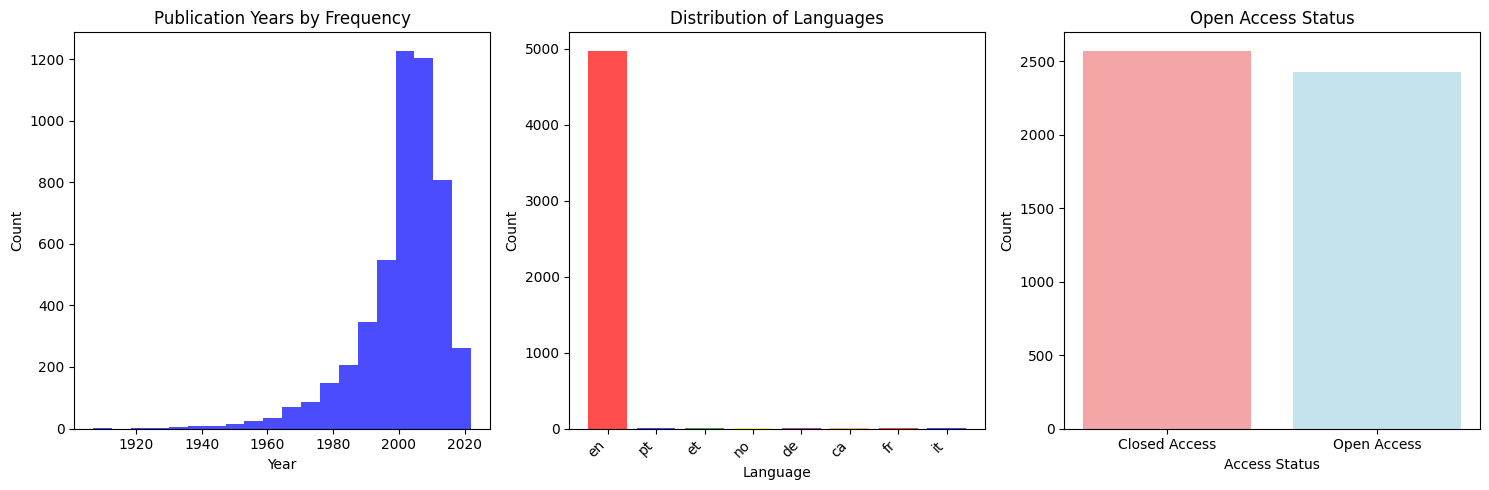

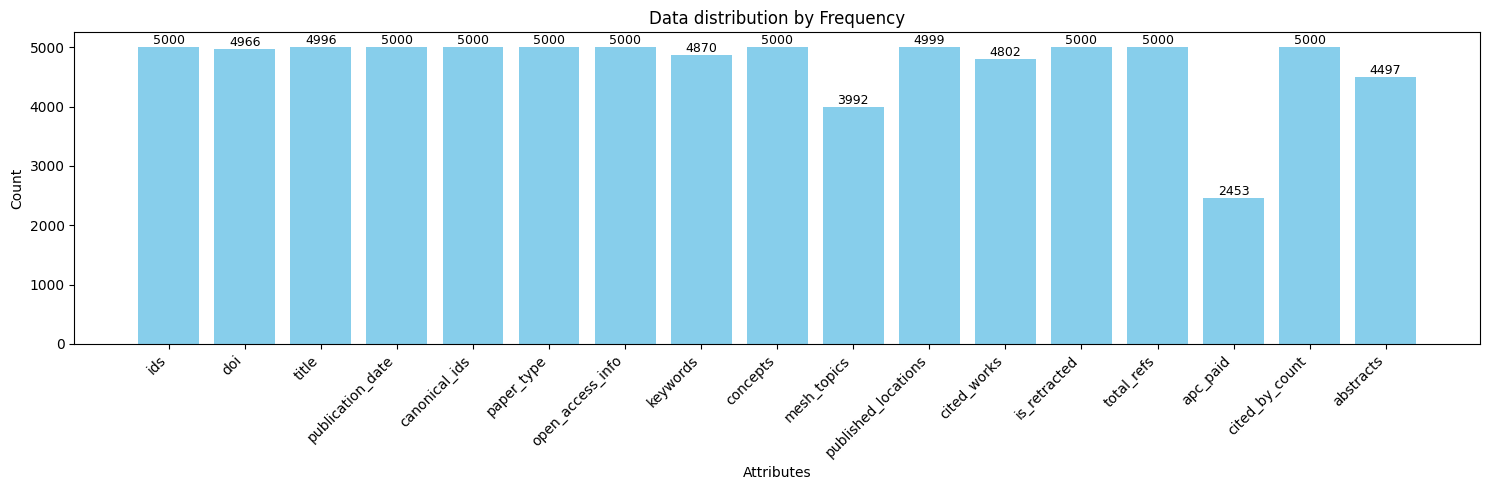

In [48]:
import matplotlib.pyplot as plt
from collections import Counter

def plot_combined_analysis(pub_years, languages, is_oa):
    # Filter out None values from languages
    languages = [lang for lang in languages if lang is not None]

    # Plotting
    plt.figure(figsize=(15, 5))

    # Plot for publication years
    plt.subplot(1, 3, 1)
    plt.hist(pub_years, bins=20, color='blue', alpha=0.7)
    plt.title('Publication Years by Frequency')
    plt.xlabel('Year')
    plt.ylabel('Count')

    # Plot for languages as a bar chart
    plt.subplot(1, 3, 2)
    language_counts = Counter(languages)
    labels, counts = zip(*language_counts.items())
    plt.bar(labels, counts, color=['red', 'blue', 'green', 'yellow', 'purple', 'orange'], alpha=0.7)
    plt.title('Distribution of Languages')
    plt.xlabel('Language')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')

    # Bar Chart for Open Access Status
    plt.subplot(1, 3, 3)
    oa_counts = Counter(is_oa)
    labels, counts = zip(*oa_counts.items())
    plt.bar(labels, counts, color=['lightblue', 'lightcoral'], alpha=0.7)
    plt.title('Open Access Status')
    plt.xlabel('Access Status')
    plt.ylabel('Count')
    plt.xticks(labels, ['Open Access', 'Closed Access'])

    plt.tight_layout()
    plt.show()

# Beispielaufruf
plot_combined_analysis(pub_years, languages, is_oa)
plot_filtered_lists([ids, doi, title, publication_date, canonical_ids, paper_type, open_access_info, keywords, concepts, mesh_topics, published_locations, cited_works, is_retracted, total_refs, apc_paid, cited_by_count], count_with_abstract)


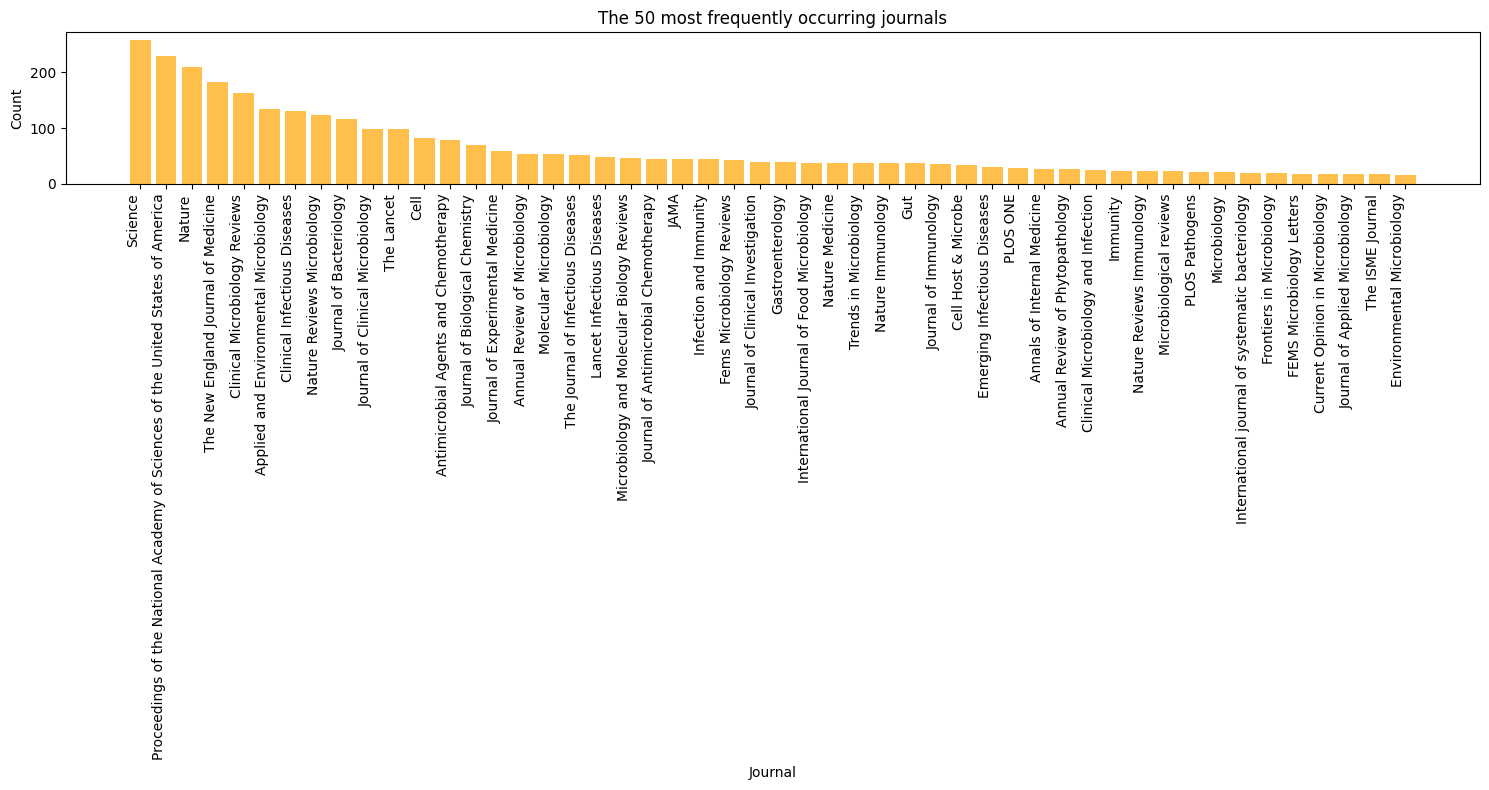

Die Gesamtzahl der eindeutigen Journale beträgt: 773


In [18]:
filtered_journals = [journal for journal in journals if journal is not None]

journal_counts = Counter(filtered_journals)

sorted_counts = dict(sorted(journal_counts.items(), key=lambda item: item[1], reverse=True)[:50])
labels, counts = zip(*sorted_counts.items())

plt.figure(figsize=(15, 8))
plt.bar(labels, counts, color='orange', alpha=0.7)
plt.title('The 50 most frequently occurring journals')
plt.xlabel('Journal')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.tight_layout() 
plt.show()
unique_journals = set(journals)
total_unique_journals = len(unique_journals)
print("Die Gesamtzahl der eindeutigen Journale beträgt:", total_unique_journals)